In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder

import statsmodels.api as sm


# Logistic Regression on Attrition problem

In [2]:
df1 = pd.read_csv('Dataset/general_data.csv')
df1.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [3]:
df1 = df1.drop(columns = ['EmployeeID', 'EmployeeCount', 'Over18', 'StandardHours' ])

In [4]:
encode_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
for col in encode_cols:
    enc = LabelEncoder()
    df1[col] = enc.fit_transform(df1[col])

In [5]:
df1.dropna(inplace=True)

In [6]:
y1 = df1['Attrition']
x1 = df1.drop(columns = ['Attrition'])

In [7]:
X1 = sm.add_constant(x1)
logistic_model1 = sm.Logit(y1,X1)

In [8]:
result1 = logistic_model1.fit()

Optimization terminated successfully.
         Current function value: 0.392916
         Iterations 7


In [9]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4382
Model:                          Logit   Df Residuals:                     4362
Method:                           MLE   Df Model:                           19
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                  0.1093
Time:                        18:06:49   Log-Likelihood:                -1721.8
converged:                       True   LL-Null:                       -1933.1
Covariance Type:            nonrobust   LLR p-value:                 8.681e-78
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0270      0.414      0.065      0.948      -0.785       0.839
Age                        -0.0307      0.007     -4.478      0.000      -0.044      -0.017
BusinessTravel             -0.0137      0.066     -0.209      0.834      -0.143       0.115
Department                 -0.2229      0.082     -2.735      0.006      -0.383      -0.063
DistanceFromHome           -0.0012      0.005     -0.231      0.818      -0.012       0.009
Education                  -0.0664      0.043     -1.555      0.120      -0.150       0.017
EducationField             -0.0954      0.034     -2.849      0.004      -0.161      -0.030
Gender                      0.0855      0.090      0.952      0.341      -0.091       0.262
JobLevel                   -0.0285      0.040     -0.716      0.474      -0.107       0.050
JobRole                     0.0400      0.018      2.226      0.026       0.005       0.075
MaritalStatus               0.5835      0.063      9.212      0.000       0.459       0.708
MonthlyIncome           -1.815e-06   9.57e-07     -1.897      0.058   -3.69e-06    6.01e-08
NumCompaniesWorked          0.1174      0.018      6.390      0.000       0.081       0.153
PercentSalaryHike           0.0126      0.012      1.067      0.286      -0.011       0.036
StockOptionLevel           -0.0675      0.052     -1.302      0.193      -0.169       0.034
TotalWorkingYears          -0.0584      0.012     -4.873      0.000      -0.082      -0.035
TrainingTimesLastYear      -0.1443      0.035     -4.097      0.000      -0.213      -0.075
YearsAtCompany              0.0132      0.018      0.718      0.473      -0.023       0.049
YearsSinceLastPromotion     0.1328      0.020      6.479      0.000       0.093       0.173
YearsWithCurrManager       -0.1394      0.022     -6.288      0.000      -0.183      -0.096
===========================================================================================
"""

## Inference

The following factors highly affect attrition in employees:

    -> Age of the employee
    -> Marital status of the employee
    -> Total number of companies the employee has worked for
    -> Total number of years the employee has worked so far
    -> Number of times training was conducted for this employee last year
    -> Number of years since last promotion
    -> Number of years under current manager
    -> Field of education
    -> Department in company

# Logistic Regression on Bank loan prediction

In [10]:
df2 = pd.read_excel('Dataset/Bank_Personal_Loan_Modelling.xlsx',sheet_name='Data')
df2.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [11]:
df2 = df2.drop(columns = ['ID', 'ZIP Code'] )
df2.drop_duplicates(inplace=True)
df2.shape

(4987, 12)

In [12]:
y2 = df2['Personal Loan']
x2 = df2[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
        'Securities Account', 'CD Account', 'Online', 'CreditCard']]

In [13]:
X2 = sm.add_constant(x2)
logistic_model2 = sm.Logit(y2,X2)

In [14]:
result2 = logistic_model2.fit()

Optimization terminated successfully.
         Current function value: 0.128720
         Iterations 9


In [15]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 4987
Model:                          Logit   Df Residuals:                     4975
Method:                           MLE   Df Model:                           11
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                  0.5936
Time:                        18:06:52   Log-Likelihood:                -641.93
converged:                       True   LL-Null:                       -1579.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1727      1.645     -7.399      0.000     -15.397      -8.948
Age                   -0.0541      0.061     -0.882      0.378      -0.174       0.066
Experience             0.0642      0.061      1.054      0.292      -0.055       0.184
Income                 0.0545      0.003     20.822      0.000       0.049       0.060
Family                 0.6947      0.074      9.348      0.000       0.549       0.840
CCAvg                  0.1236      0.040      3.117      0.002       0.046       0.201
Education              1.7363      0.115     15.091      0.000       1.511       1.962
Mortgage               0.0005      0.001      0.848      0.396      -0.001       0.002
Securities Account    -0.9371      0.286     -3.280      0.001      -1.497      -0.377
CD Account             3.8181      0.324     11.788      0.000       3.183       4.453
Online                -0.6724      0.157     -4.280      0.000      -0.980      -0.364
CreditCard            -1.1181      0.205     -5.454      0.000      -1.520      -0.716
======================================================================================
"""

## Inference

When a bank wants to offer a loan, the following factors are highly significant:

    -> Annual income of the customer
    -> Family size of the customer
    -> Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
    -> Does the customer have a certificate of deposit (CD) account with the bank?
    -> Does the customer use internet banking facilities?
    -> Does the customer use a credit card issued by UniversalBank?
The following factors are also significant to some extent:

    -> Avg. spending on credit cards per month
    -> Does the customer have a securities account with the bank

# Linear Regression on Real estate data

In [16]:
lr_data = pd.read_excel('Dataset/Linear Regression.xlsx',sheet_name='Linear Regression')
lr_data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [17]:
lr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.3 KB


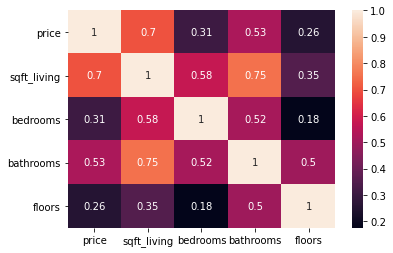

In [18]:
sns.heatmap(lr_data.corr(),annot=True)

### Linear Regression between Sqft.living  and price

In [19]:
sqft_living = pd.DataFrame(lr_data['sqft_living'])
price = pd.DataFrame(lr_data['price'])

In [20]:
X_train , X_test , y_train , y_test = train_test_split(price,sqft_living)

In [21]:
y_train.shape

(16209, 1)

In [22]:
lr_model = LinearRegression()

lr_model.fit(X_train,y_train)

LinearRegression()

In [23]:
lr_model.coef_

array([[0.00175189]])

In [24]:
lr_model.intercept_

array([1139.03684675])

In [25]:
y_pred = lr_model.predict(X_test)

Text(0, 0.5, 'Price')

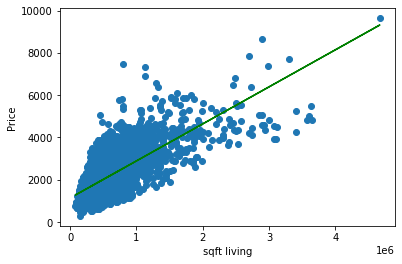

In [26]:
plt.scatter(X_test,y_test)
plt.plot(X_test,lr_model.predict(X_test),color = 'green')
plt.xlabel('sqft living')
plt.ylabel('Price')

In [27]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print('RMSE = ',rmse)
print('R2_score = ',r2)

RMSE =  653.4049336431813
R2_score =  0.49103808516488223


### LINEAR REGRESSION MODEL BETWEEN PRICE AND BEDROOMS

In [28]:
bedroom = lr_data.iloc[:,2:3]

In [29]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(price,bedroom,test_size = 0.3,random_state = 3)


In [30]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

LinearRegression()

In [31]:
model2.coef_


array([[7.83305263e-07]])

In [32]:
model2.intercept_

array([2.9512172])

In [33]:
y_pred2 = model2.predict(X_test2)


Text(0, 0.5, 'Number of bedrooms')

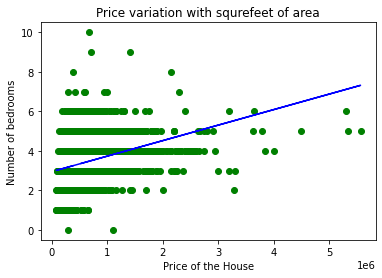

In [34]:
plt.scatter(X_test2,y_test2, color = 'green')
plt.plot(X_test2, model2.predict(X_test2), color = 'blue')
plt.title('Price variation with squrefeet of area')
plt.xlabel('Price of the House')
plt.ylabel("Number of bedrooms")

In [35]:
RMSE2 = np.sqrt(mean_squared_error(y_test2, y_pred2))
r_square2 = r2_score(y_test2, y_pred2)

print(f'The R-Square value is....{r_square2}')
print(f'The RMSE value is........{RMSE2}')

The R-Square value is....0.09876923049599795
The RMSE value is........0.8577257263469096


### LINEAR REGRESSION MODEL BETWEEN PRICE AND BATHROOMS:

In [36]:
bathroom = lr_data.iloc[:,3:4]

In [37]:
X_train3,X_test3,y_train3,y_test3 = train_test_split(price,bathroom,test_size = 0.3,random_state = 3)

In [38]:
model3 = LinearRegression()
model3.fit(X_train3,y_train3)

LinearRegression()

In [39]:
model3.coef_

array([[1.0889318e-06]])

In [40]:
model3.intercept_

array([1.528327])

Text(0, 0.5, 'Number of bathrooms')

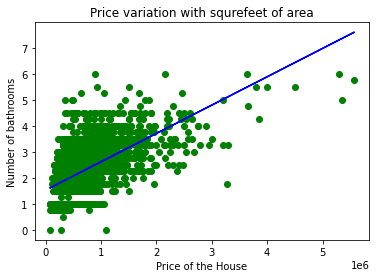

In [41]:
plt.scatter(X_test3,y_test3, color = 'green')
plt.plot(X_test3, model3.predict(X_test3), color = 'blue')
plt.title('Price variation with squrefeet of area')
plt.xlabel('Price of the House')
plt.ylabel("Number of bathrooms")

In [42]:
y_pred3 = model3.predict(X_test3)

In [43]:
RMSE3 = np.sqrt(mean_squared_error(y_test3, y_pred3))
r_square3 = r2_score(y_test3, y_pred3)

print(f'The R-Square value is....{r_square3}')
print(f'The RMSE value is........{RMSE3}')

The R-Square value is....0.28345294078258765
The RMSE value is........0.6581709754562117


### LINEAR REGRESSION MODEL BETWEEN PRICE AND FLOORS:

In [44]:
floor = lr_data.iloc[:,4:5]

In [45]:
X_train4,X_test4,y_train4,y_test4 = train_test_split(price,floor,test_size = 0.3,random_state = 3)

In [46]:
model4 = LinearRegression()
model4.fit(X_train4,y_train4)

LinearRegression()

In [47]:
y_pred4 = model4.predict(X_test4)


Text(0, 0.5, 'Number of floors')

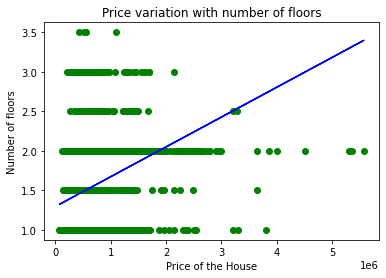

In [48]:
plt.scatter(X_test4,y_test4, color = 'green')
plt.plot(X_test4,model4.predict(X_test4), color = 'blue')
plt.title('Price variation with number of floors')
plt.xlabel('Price of the House')
plt.ylabel("Number of floors")

In [49]:
RMSE4 = np.sqrt(mean_squared_error(y_test4, y_pred4))
r_square4 = r2_score(y_test4, y_pred4)

print(f'The R-Square value is....{r_square4}')
print(f'The RMSE value is........{RMSE4}')

The R-Square value is....0.06539276476247435
The RMSE value is........0.5206765956498255


### MULTIPLE LINEAR REGRESSION

In [50]:
x = lr_data.iloc[:,1:5]
y = lr_data.iloc[:,:1]

In [51]:
X_train5,X_test5,y_train5,y_test5 = train_test_split(x,y,test_size = 0.3,random_state = 3)

In [52]:
model_mul = LinearRegression(normalize=True)
model_mul

LinearRegression(normalize=True)

In [53]:
model_mul.fit(X_train5,y_train5)

LinearRegression(normalize=True)

In [54]:
y_pred5 = model_mul.predict(X_test5)

In [55]:
RMSE5 = np.sqrt(mean_squared_error(y_test5, y_pred5))
r_square5 = r2_score(y_test5, y_pred5)

print(f'The R-Square value is....{r_square5}')
print(f'The RMSE value is........{RMSE5}')

The R-Square value is....0.5121711417995447
The RMSE value is........255713.67543348117
